## import data set and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings (1).csv to hotel_bookings (1).csv


In [5]:
df = pd.read_csv('hotel_bookings (1).csv')

## understanding the data

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [11]:
df.describe(include = 'object')


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [14]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
df = df[df['adr']<5000]

In [20]:
df.duplicated().sum()

np.int64(31984)

In [21]:
df.drop_duplicates(inplace=True)


## data visualization

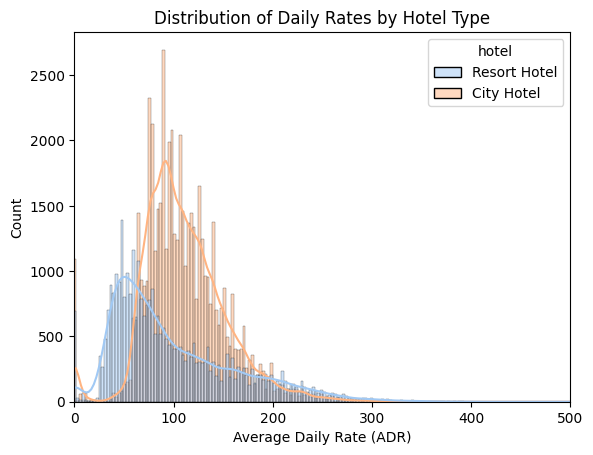

In [81]:

# Distribution of ADR (Average Daily Rate)
sns.histplot(data=df, x="adr", hue="hotel", kde=True, palette="pastel")
plt.xlim(0, 500)  # cut off extreme outliers
plt.title("Distribution of Daily Rates by Hotel Type")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Count")
plt.show()


City hotels tend to have a higher average daily rate (ADR) than resort hotels.

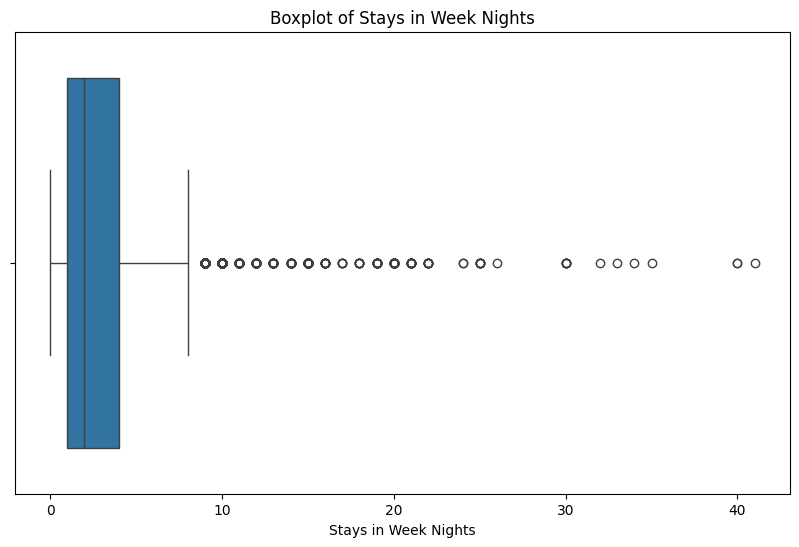

In [32]:
# Boxplot for Stays in Week Nights
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['stays_in_week_nights'])
plt.title('Boxplot of Stays in Week Nights')
plt.xlabel('Stays in Week Nights')
plt.show()

The majority of stays in week nights are relatively short, with a few outliers indicating longer stays.

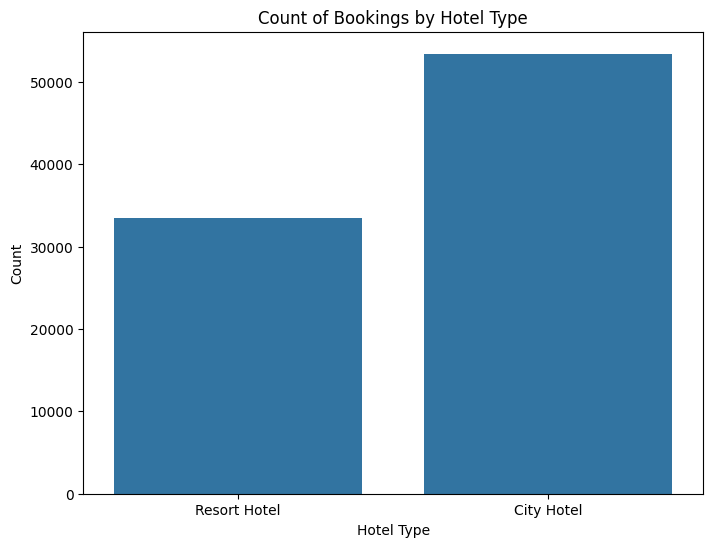

In [33]:
# Countplot for Hotel Type
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', data=df)
plt.title('Count of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

There are significantly more bookings for City Hotels compared to Resort Hotels.

/tmp/ipython-input-3013897894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_canceled", data=df, palette="pastel")


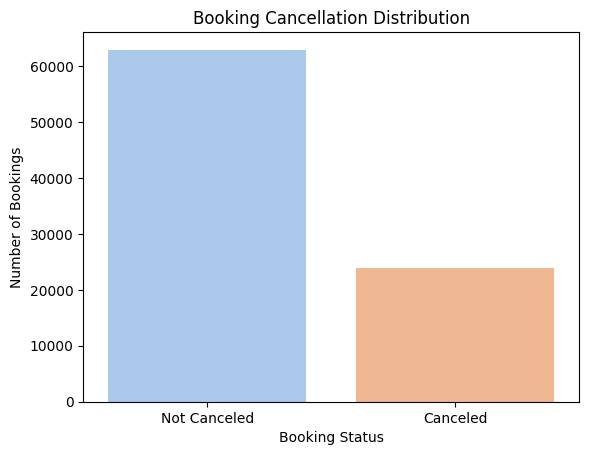

In [79]:
# count plot for cancellation
sns.countplot(x="is_canceled", data=df, palette="pastel")
plt.xticks([0,1], ["Not Canceled", "Canceled"])
plt.title("Booking Cancellation Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()


A substantial number of bookings are canceled, indicating this is a key area to investigate further.

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

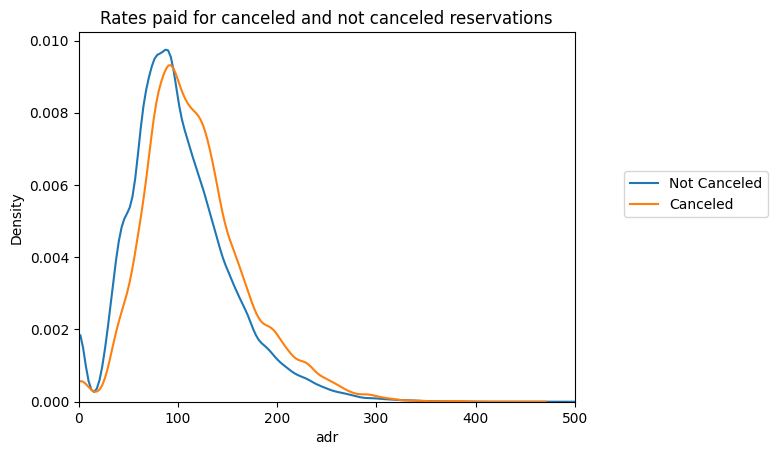

In [27]:
# kde plot for rates paid vs cancellation status
plt.xlim(0, 500)
sns.kdeplot(data = df[df['is_canceled'] == 0], x = 'adr', label = 'Not Canceled')
sns.kdeplot(data = df[df['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

The distribution of ADR for canceled and not canceled bookings appears similar, suggesting ADR alone might not be a strong predictor of cancellation.


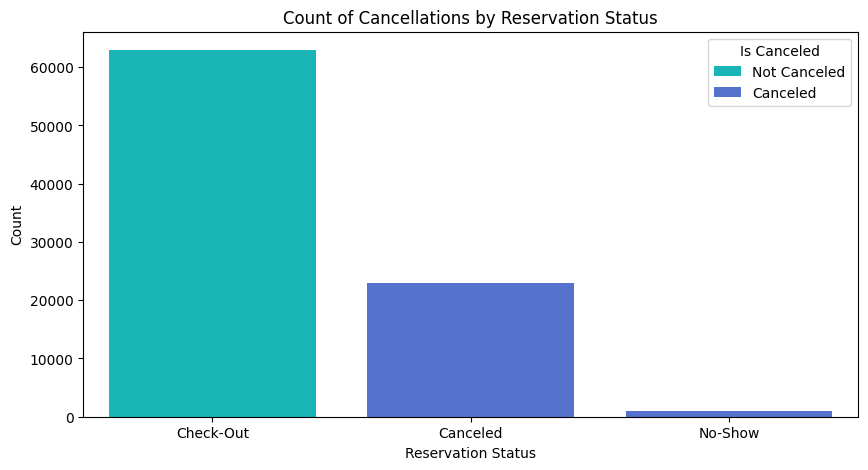

In [35]:
# count plot for cacellations vs reservation status
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

The majority of canceled bookings have a "Canceled" or "No-Show" status.

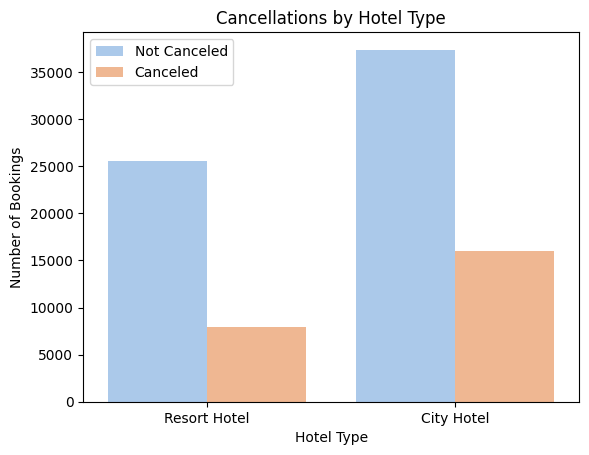

In [80]:
# count plot for hotel type vs cancellation
sns.countplot(x="hotel", hue="is_canceled", data=df, palette="pastel")
plt.xticks(rotation=0)
plt.title("Cancellations by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.legend(["Not Canceled", "Canceled"])
plt.show()


City hotels have a higher number of canceled bookings compared to resort hotels.

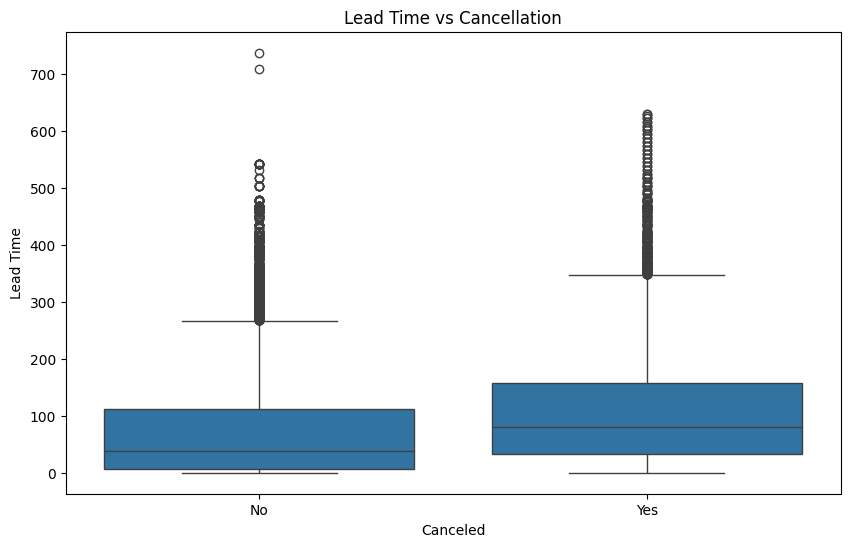

In [37]:
# Lead Time vs Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Bookings with longer lead times appear to have a higher likelihood of being canceled, as shown by the higher median lead time for canceled bookings in the boxplot.

/tmp/ipython-input-1082981869.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_type', y='stays_in_weekend_nights', data=df, ci=None)


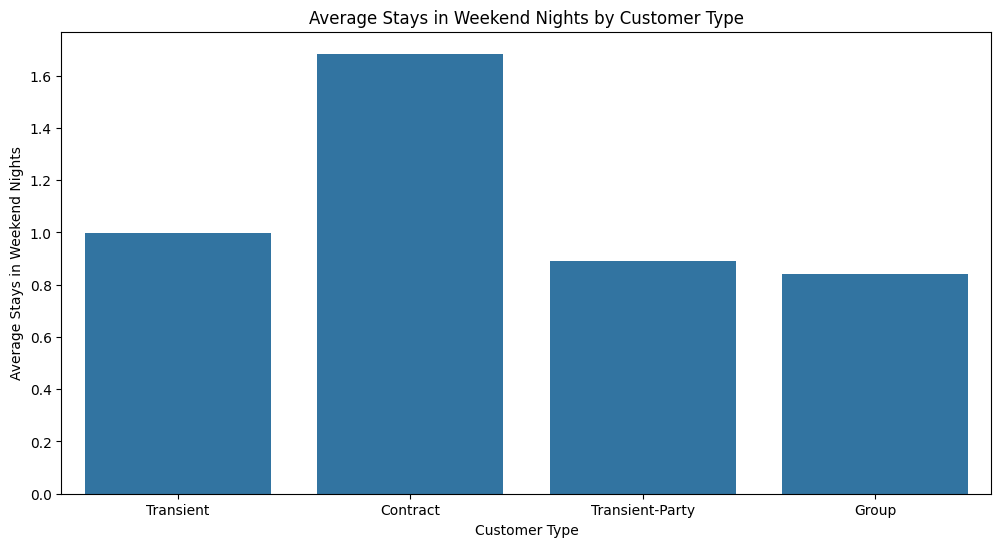

In [38]:
# Stays in Weekend Nights by Customer Type
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='stays_in_weekend_nights', data=df, ci=None)
plt.title('Average Stays in Weekend Nights by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Stays in Weekend Nights')
plt.show()

 'Contract' customer type has the highest average stay in weekend nights.

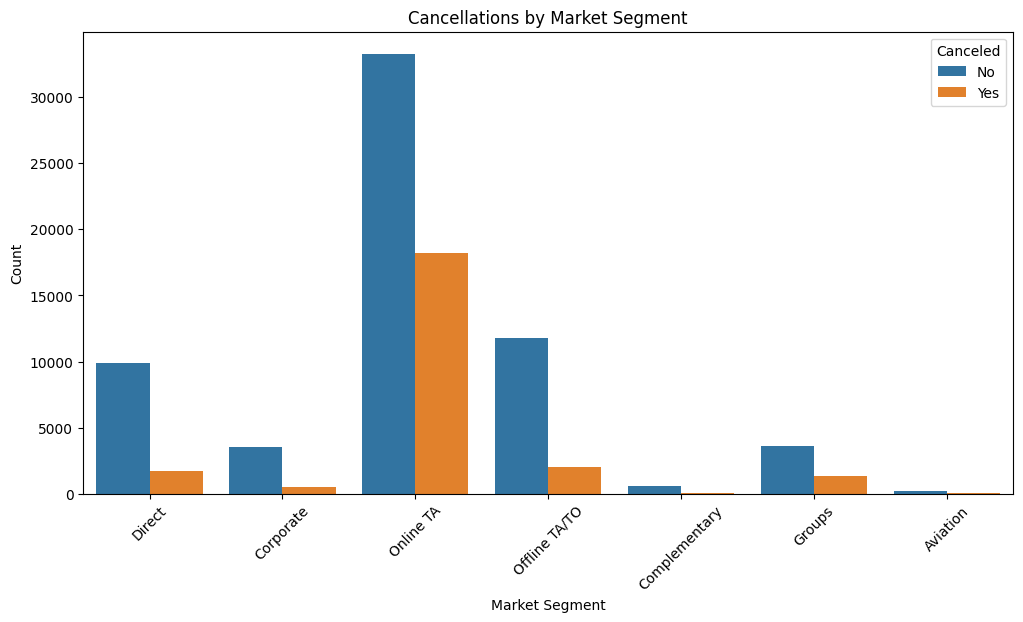

In [39]:
# Market Segment vs Cancellation Rate
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

 'Online TA' and 'Offline TA/TO' market segments have a high number of canceled bookings.

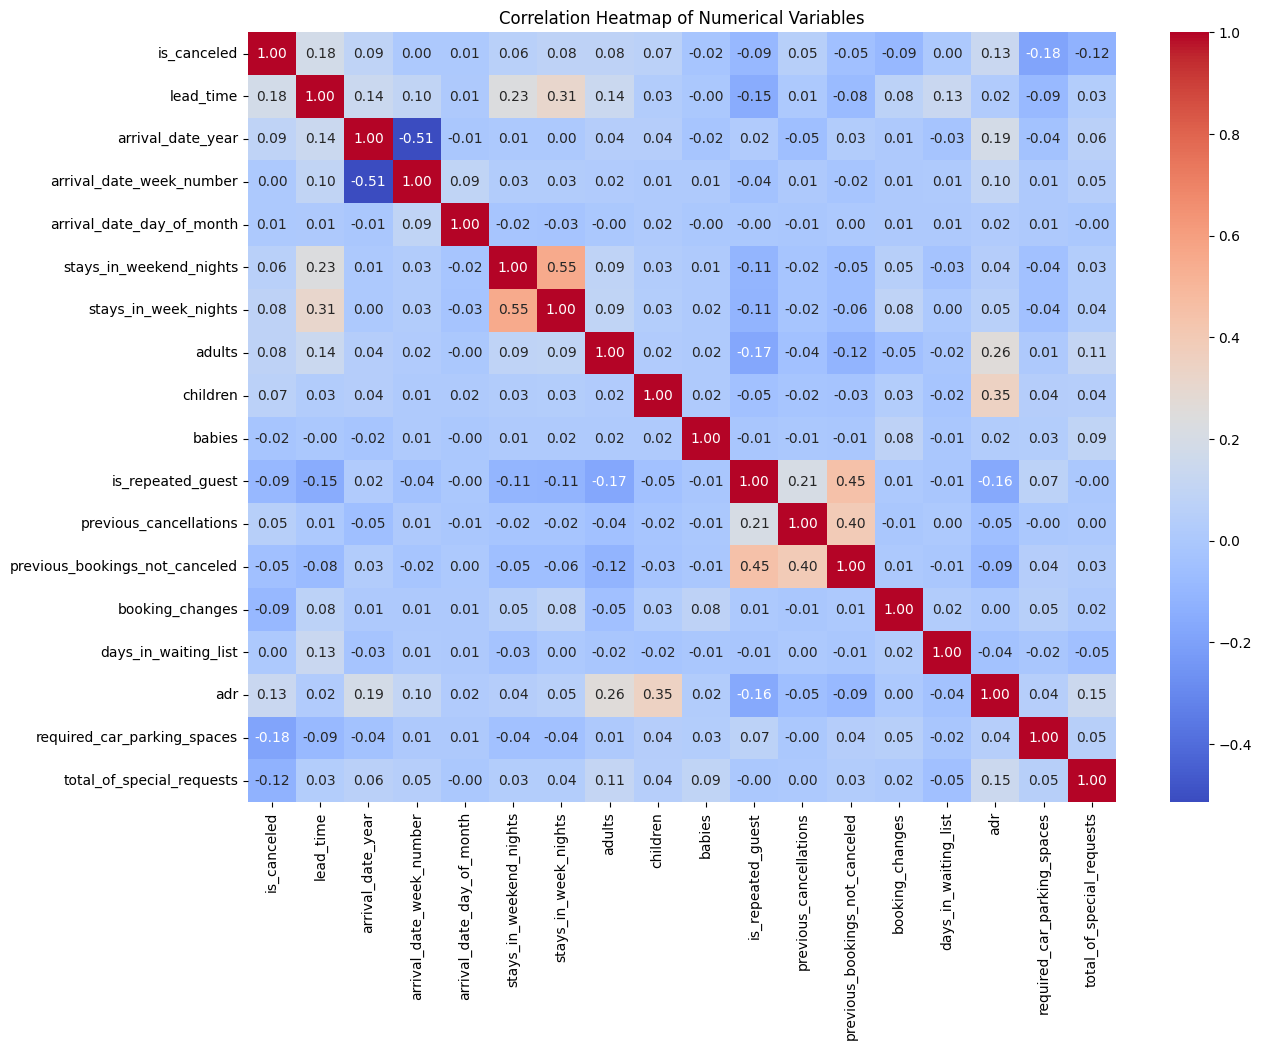

In [40]:
# Heatmap of Correlations (numerical variables only)
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

This heatmap shows the relationships between numerical features. 'lead_time' and 'adr' have a moderate positive correlation with 'is_canceled', while 'required_car_parking_spaces' and 'total_of_special_requests' have a negative correlation with 'is_canceled'.

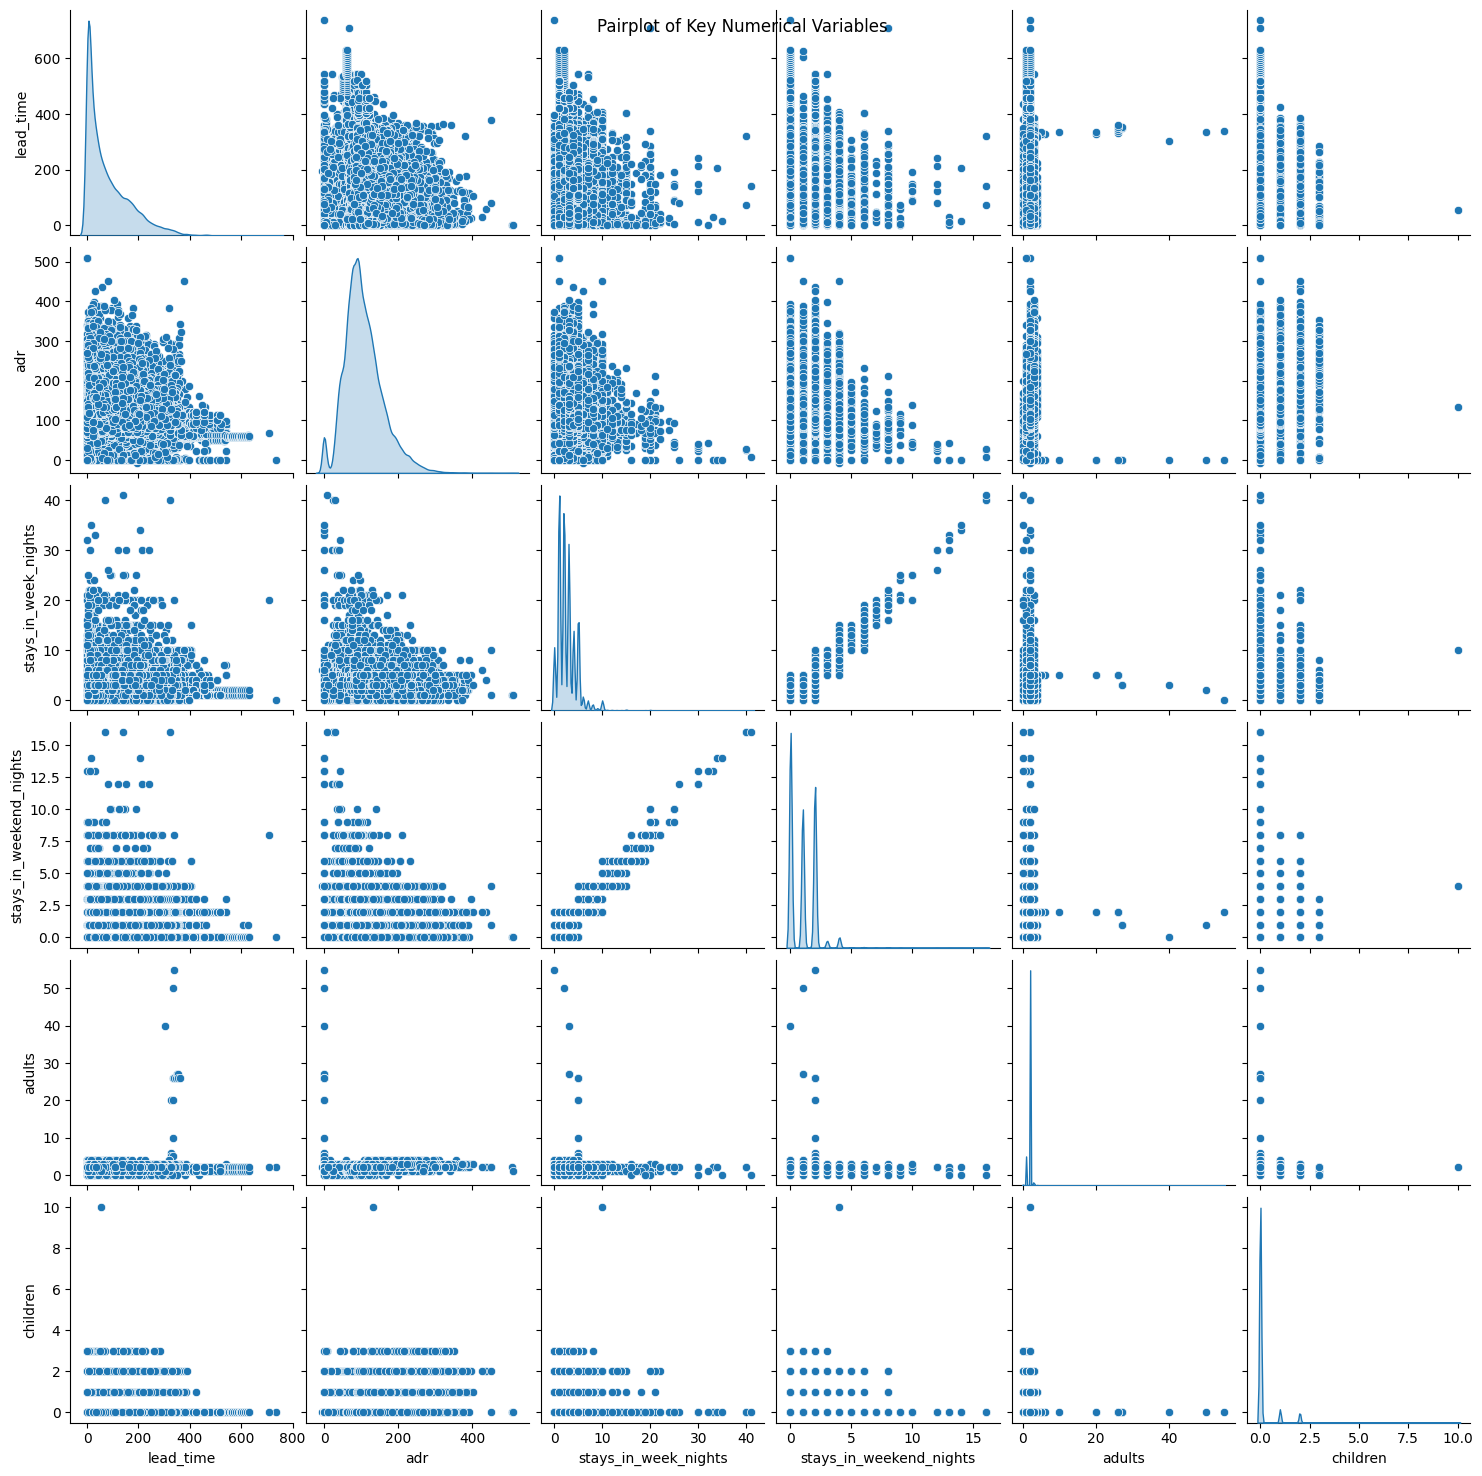

In [41]:
# Pairplot for Key Numerical Variables
key_nums = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children']
sns.pairplot(df[key_nums], diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Variables')
plt.show()

This provides pairwise relationships and distributions of key numerical features.
Cancellation Rate by Month: Cancellation rates fluctuate throughout the year, with higher rates observed in the earlier months.

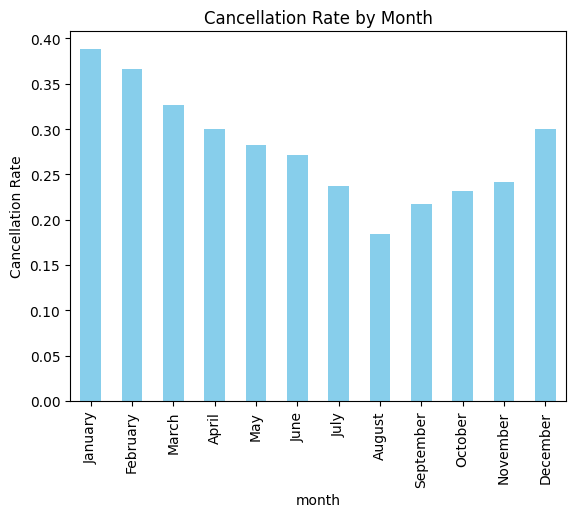

In [82]:
# cacellation through months
df["month"] = df["reservation_status_date"].dt.month_name()

monthly = df.groupby("month")["is_canceled"].mean().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

monthly.plot(kind="bar", color="skyblue")
plt.title("Cancellation Rate by Month")
plt.ylabel("Cancellation Rate")
plt.show()


Cancellation rates fluctuate throughout the year, with higher rates observed in the earlier months.

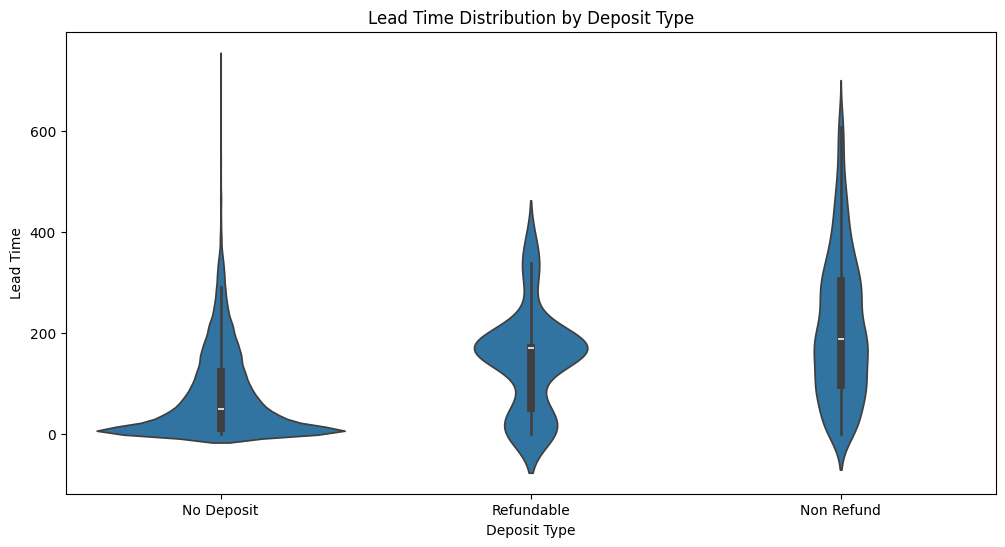

In [43]:
# Violin Plot for Lead Time by Deposit Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='deposit_type', y='lead_time', data=df)
plt.title('Lead Time Distribution by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Lead Time')
plt.show()

Bookings with 'Non Refund' deposit type tend to have much longer lead times compared to 'No Deposit' or 'Refundable'.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


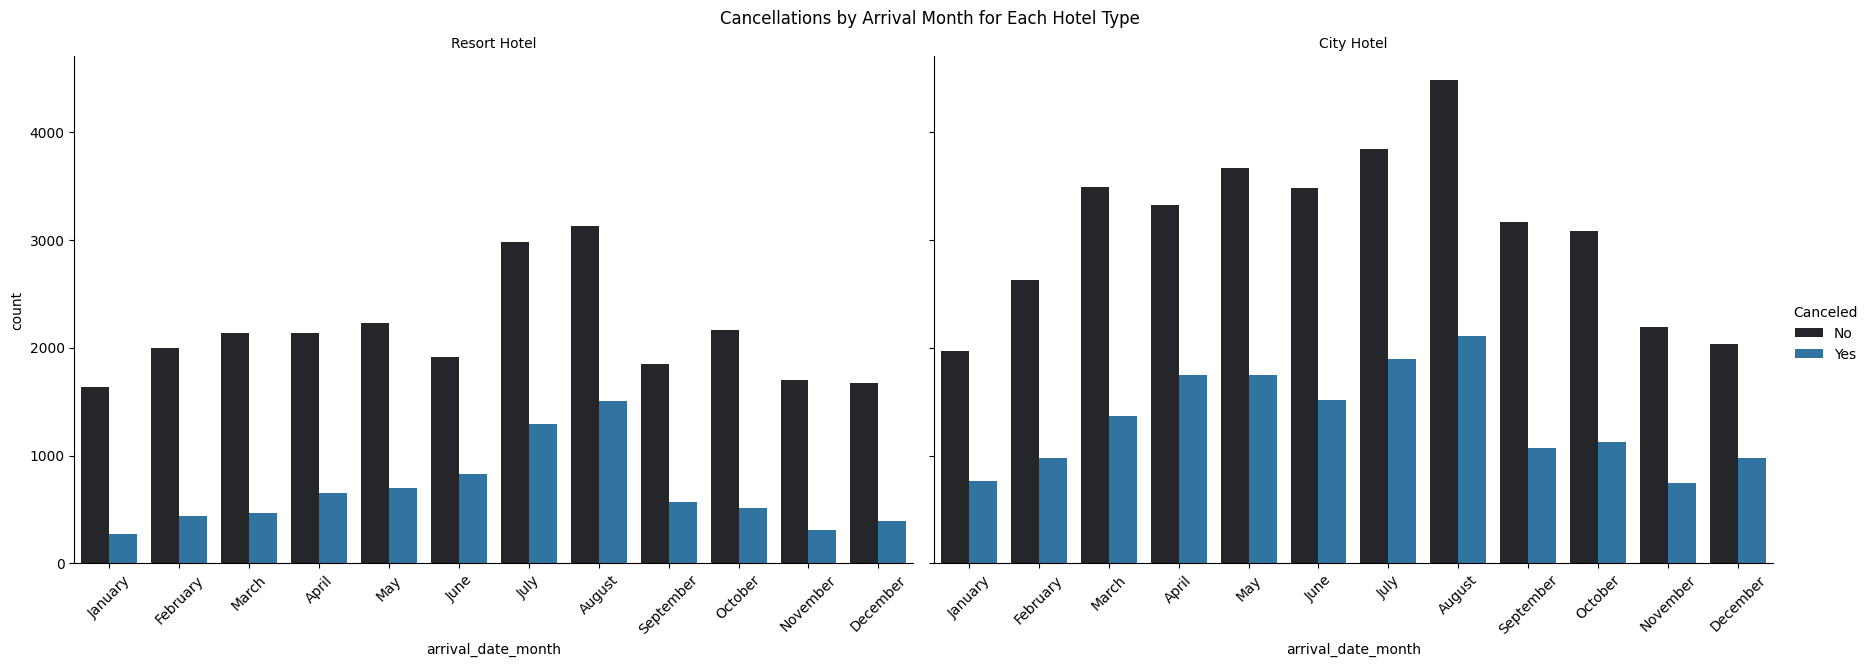

In [44]:
# FacetGrid: Cancellation by Month for Each Hotel
g = sns.FacetGrid(df, col='hotel', height=6, aspect=1.5)
g.map(sns.countplot, 'arrival_date_month', hue='is_canceled', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
g.add_legend(title='Canceled', labels=['No', 'Yes'])
g.set_xticklabels(rotation=45)
g.set_titles('{col_name}')
plt.suptitle('Cancellations by Arrival Month for Each Hotel Type', y=1.02)
plt.show()

The pattern of cancellations by month varies between resort and city hotels.
Total Special Requests vs Cancellation: Bookings with more special requests tend to have a lower cancellation rate.

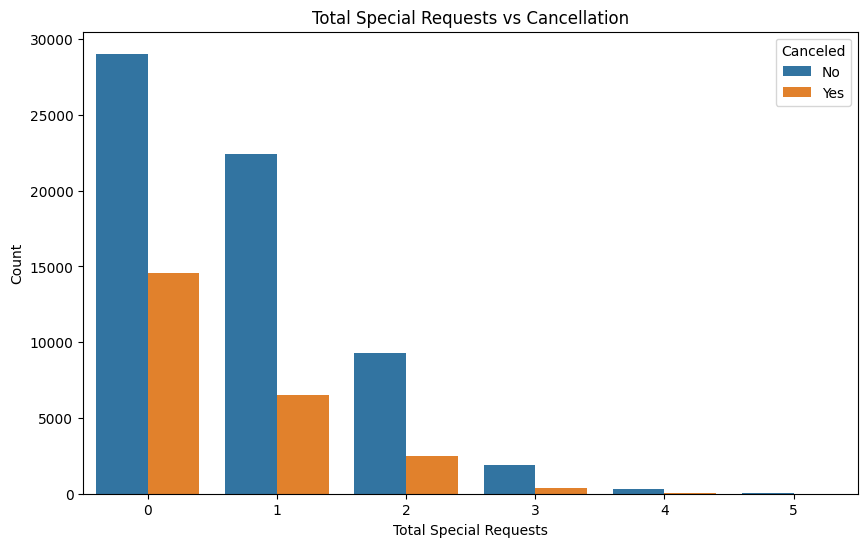

In [46]:
# Distribution of Total Special Requests by Cancellation
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df)
plt.title('Total Special Requests vs Cancellation')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

Bookings with more special requests tend to have a lower cancellation rate.

/tmp/ipython-input-4139525204.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='adr', data=df_top, ci=None)


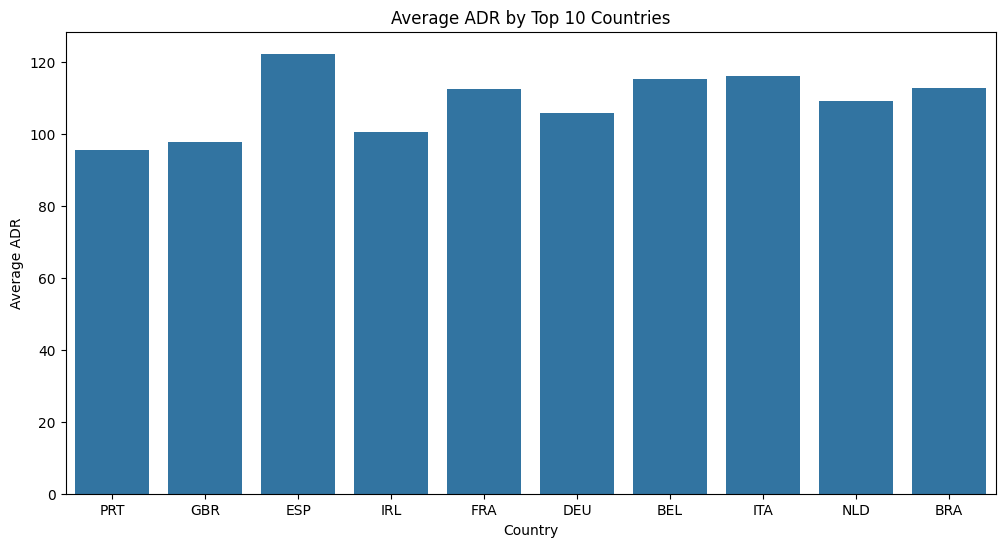

In [47]:
# Average ADR by Country (Top 10 Countries)
top_countries = df['country'].value_counts().index[:10]
df_top = df[df['country'].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='adr', data=df_top, ci=None)
plt.title('Average ADR by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average ADR')
plt.show()

The average daily rate varies by country, with some countries having significantly higher ADRs than others.

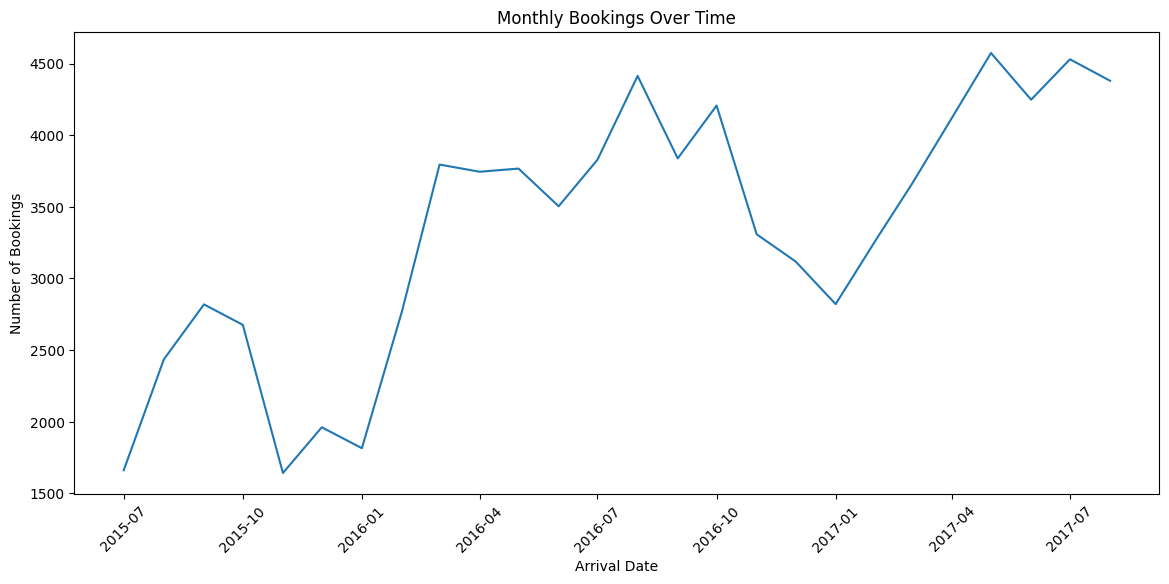

In [48]:
# Time Series: Bookings by Arrival Date Year and Month
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-01')
monthly_bookings = df.groupby('arrival_date').size().reset_index(name='bookings')
plt.figure(figsize=(14, 6))
sns.lineplot(x='arrival_date', y='bookings', data=monthly_bookings)
plt.title('Monthly Bookings Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

This plot shows the trend of bookings over the months in the dataset.

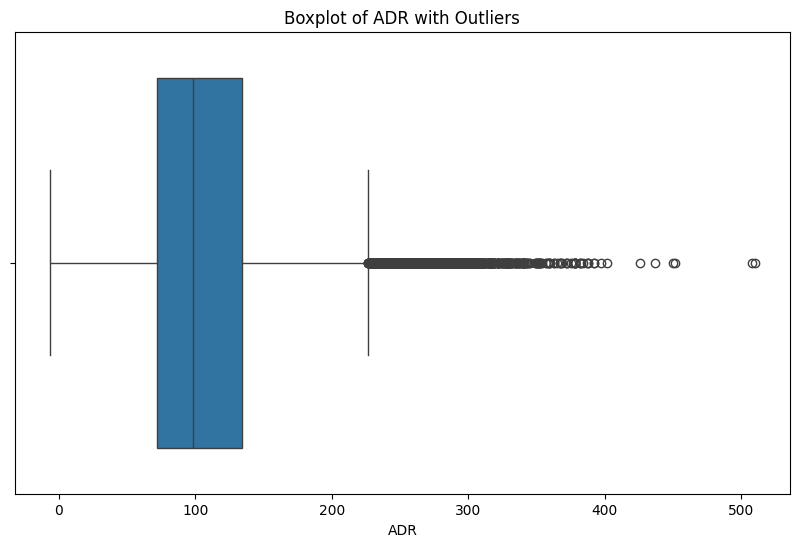

In [50]:
# Boxplot Highlighting Outliers in ADR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of ADR with Outliers')
plt.xlabel('ADR')
plt.show()

This boxplot highlights the presence of outliers in the Average Daily Rate data.

## feature engineering

In [52]:
# Total Stay Duration (weekend + week nights)
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

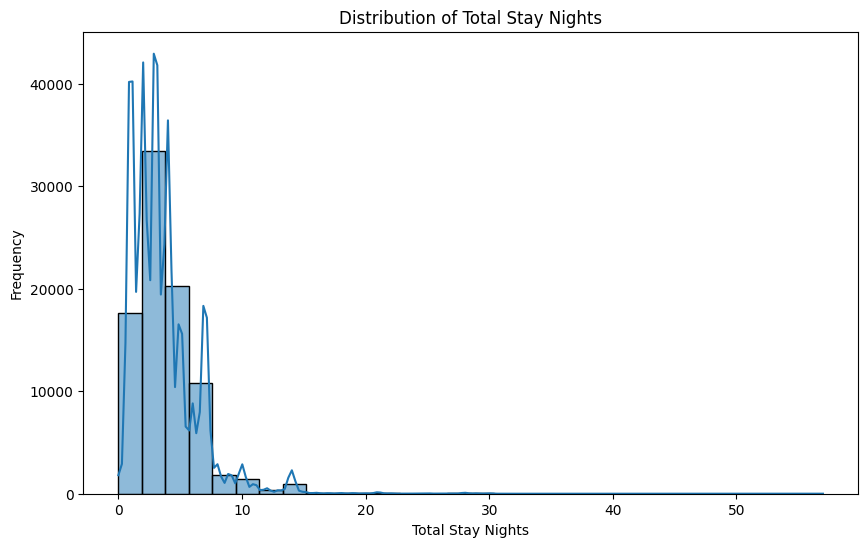

In [53]:
# Total Stay Duration
plt.figure(figsize=(10, 6))
sns.histplot(df['total_stay_nights'], bins=30, kde=True)
plt.title('Distribution of Total Stay Nights')
plt.xlabel('Total Stay Nights')
plt.ylabel('Frequency')
plt.show()

The distribution shows that most stays are short, with a peak at around 2-3 nights.

In [54]:
# Total Guests (adults + children + babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

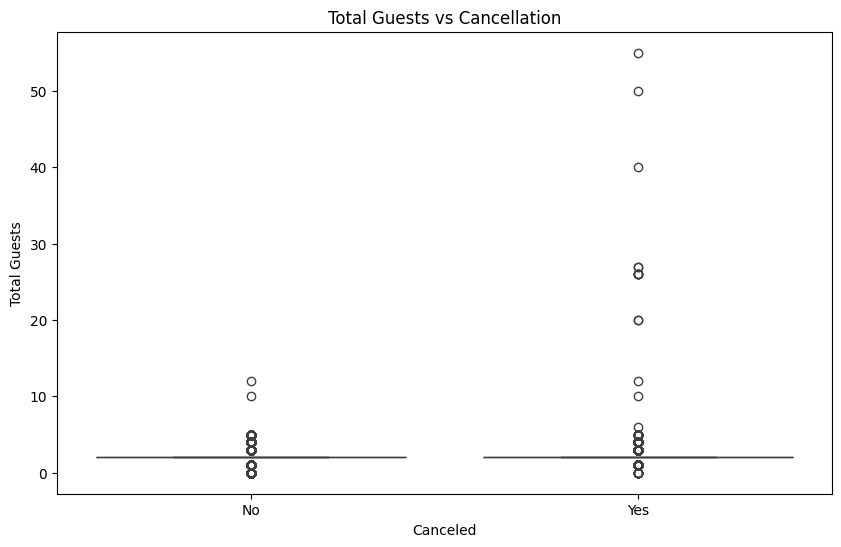

In [55]:
# Total Guests vs Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='total_guests', data=df)
plt.title('Total Guests vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Total Guests')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

There doesn't seem to be a strong relationship between the total number of guests and cancellation.

In [56]:
# Lead Time Categories (short, medium, long)
df['lead_time_category'] = pd.cut(df['lead_time'],
                                  bins=[-1, 30, 90, float('inf')],
                                  labels=['Short', 'Medium', 'Long'])

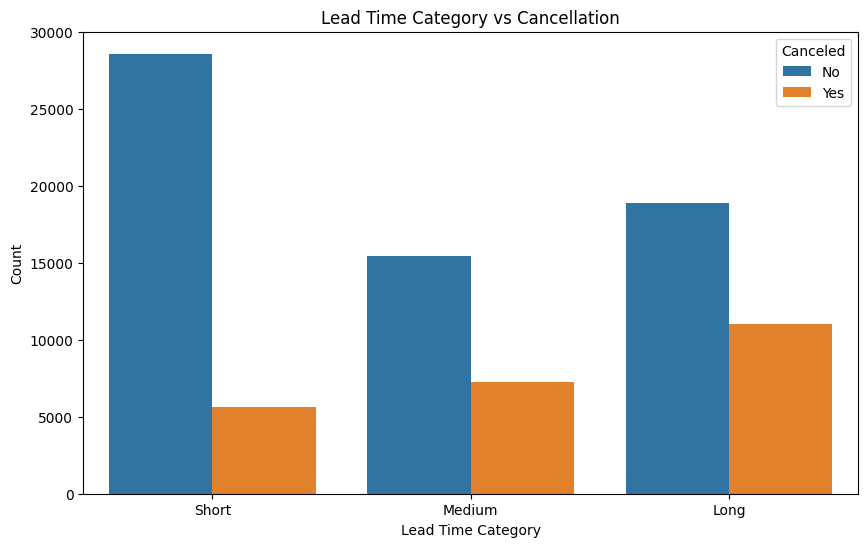

In [57]:
#  Lead Time Category vs Cancellation
plt.figure(figsize=(10, 6))
sns.countplot(x='lead_time_category', hue='is_canceled', data=df)
plt.title('Lead Time Category vs Cancellation')
plt.xlabel('Lead Time Category')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

Bookings with 'Long' lead times have a higher number of cancellations than those with 'Short' or 'Medium' lead times.

In [58]:
# Booking Changes Indicator (0 = no changes, 1 = changes made)
df['has_booking_changes'] = (df['booking_changes'] > 0).astype(int)

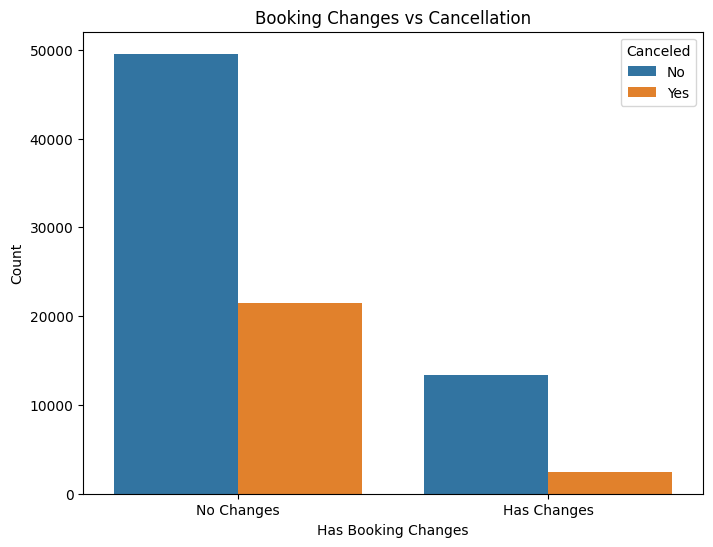

In [59]:
# Booking Changes vs Cancellation
plt.figure(figsize=(8, 6))
sns.countplot(x='has_booking_changes', hue='is_canceled', data=df)
plt.title('Booking Changes vs Cancellation')
plt.xlabel('Has Booking Changes')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.xticks([0, 1], ['No Changes', 'Has Changes'])
plt.show()

 Bookings with no booking changes are less likely to be canceled than those with changes.

In [60]:
# Is Room Type Changed (0 = same, 1 = different)
df['room_type_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

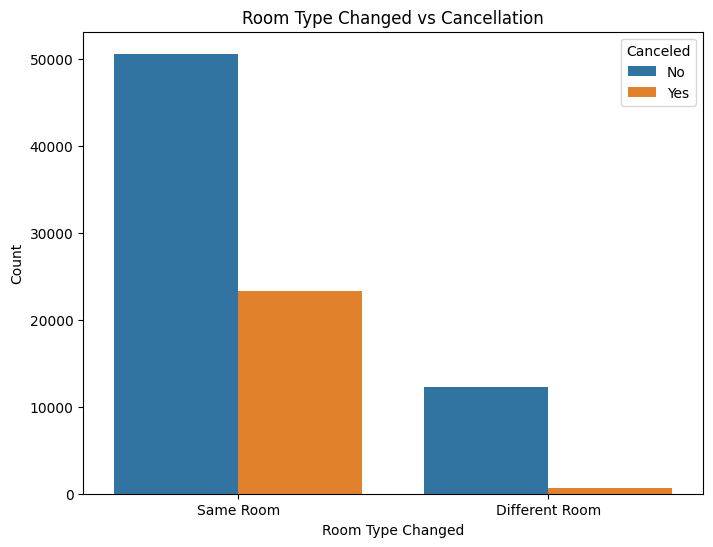

In [61]:
# Room Type Changed vs Cancellation
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type_changed', hue='is_canceled', data=df)
plt.title('Room Type Changed vs Cancellation')
plt.xlabel('Room Type Changed')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Same Room', 'Different Room'])
plt.show()

Bookings where the assigned room type is different from the reserved room type have a much higher cancellation rate.

In [62]:
# Special Requests Indicator (0 = none, 1 = has requests)
df['has_special_requests'] = (df['total_of_special_requests'] > 0).astype(int)

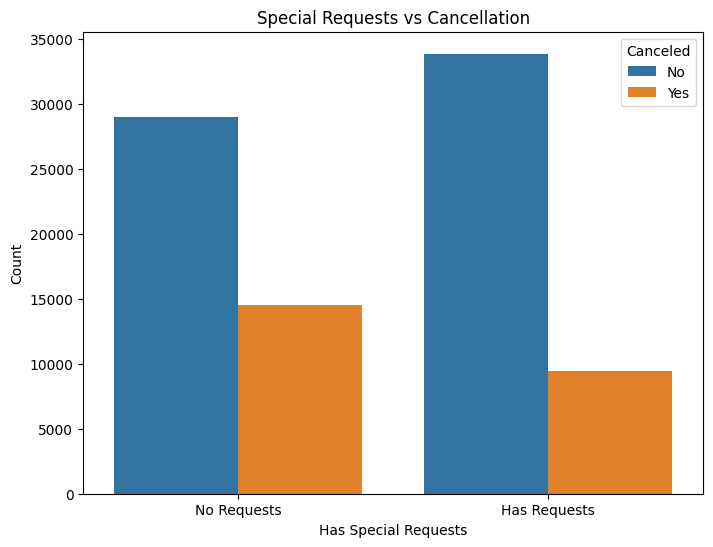

In [63]:
# Special Requests vs Cancellation
plt.figure(figsize=(8, 6))
sns.countplot(x='has_special_requests', hue='is_canceled', data=df)
plt.title('Special Requests vs Cancellation')
plt.xlabel('Has Special Requests')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.xticks([0, 1], ['No Requests', 'Has Requests'])
plt.show()

Bookings with special requests are less likely to be canceled than those without.

In [64]:
# Seasonality Feature (based on arrival month)
season_mapping = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}
df['season'] = df['arrival_date_month'].map(season_mapping).astype('category')

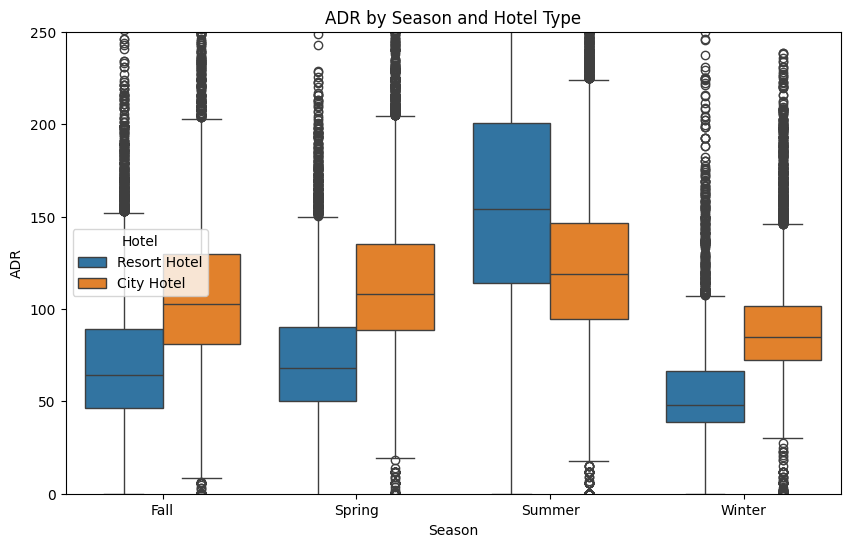

In [65]:
#  Season vs ADR
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='adr', hue='hotel', data=df)
plt.title('ADR by Season and Hotel Type')
plt.xlabel('Season')
plt.ylabel('ADR')
plt.ylim(0, 250)
plt.legend(title='Hotel')
plt.show()

ADR varies by season and hotel type. City hotels generally have higher ADRs, and both hotel types show variations in ADR across seasons.

In [66]:
# Total Previous Bookings (canceled + not canceled)
df['total_previous_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

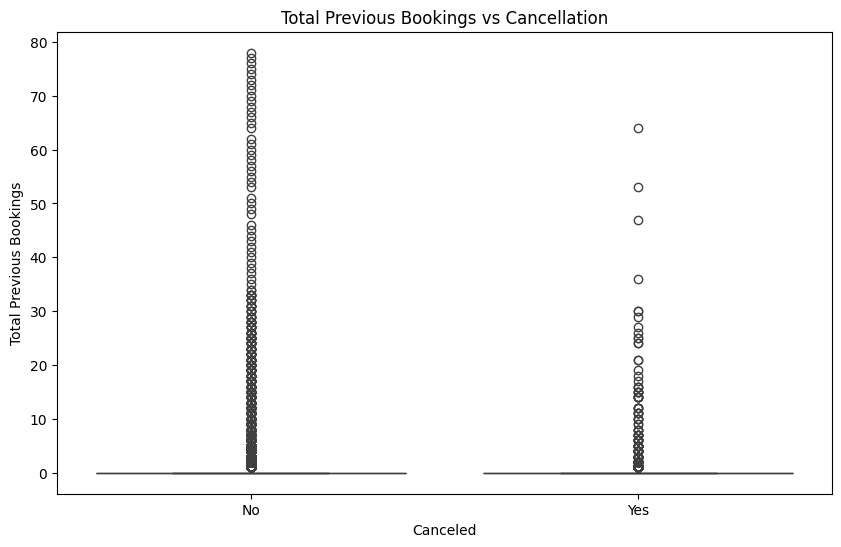

In [67]:
# Total Previous Bookings vs Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='total_previous_bookings', data=df)
plt.title('Total Previous Bookings vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Total Previous Bookings')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

There doesn't seem to be a clear relationship between the total previous bookings and cancellation.

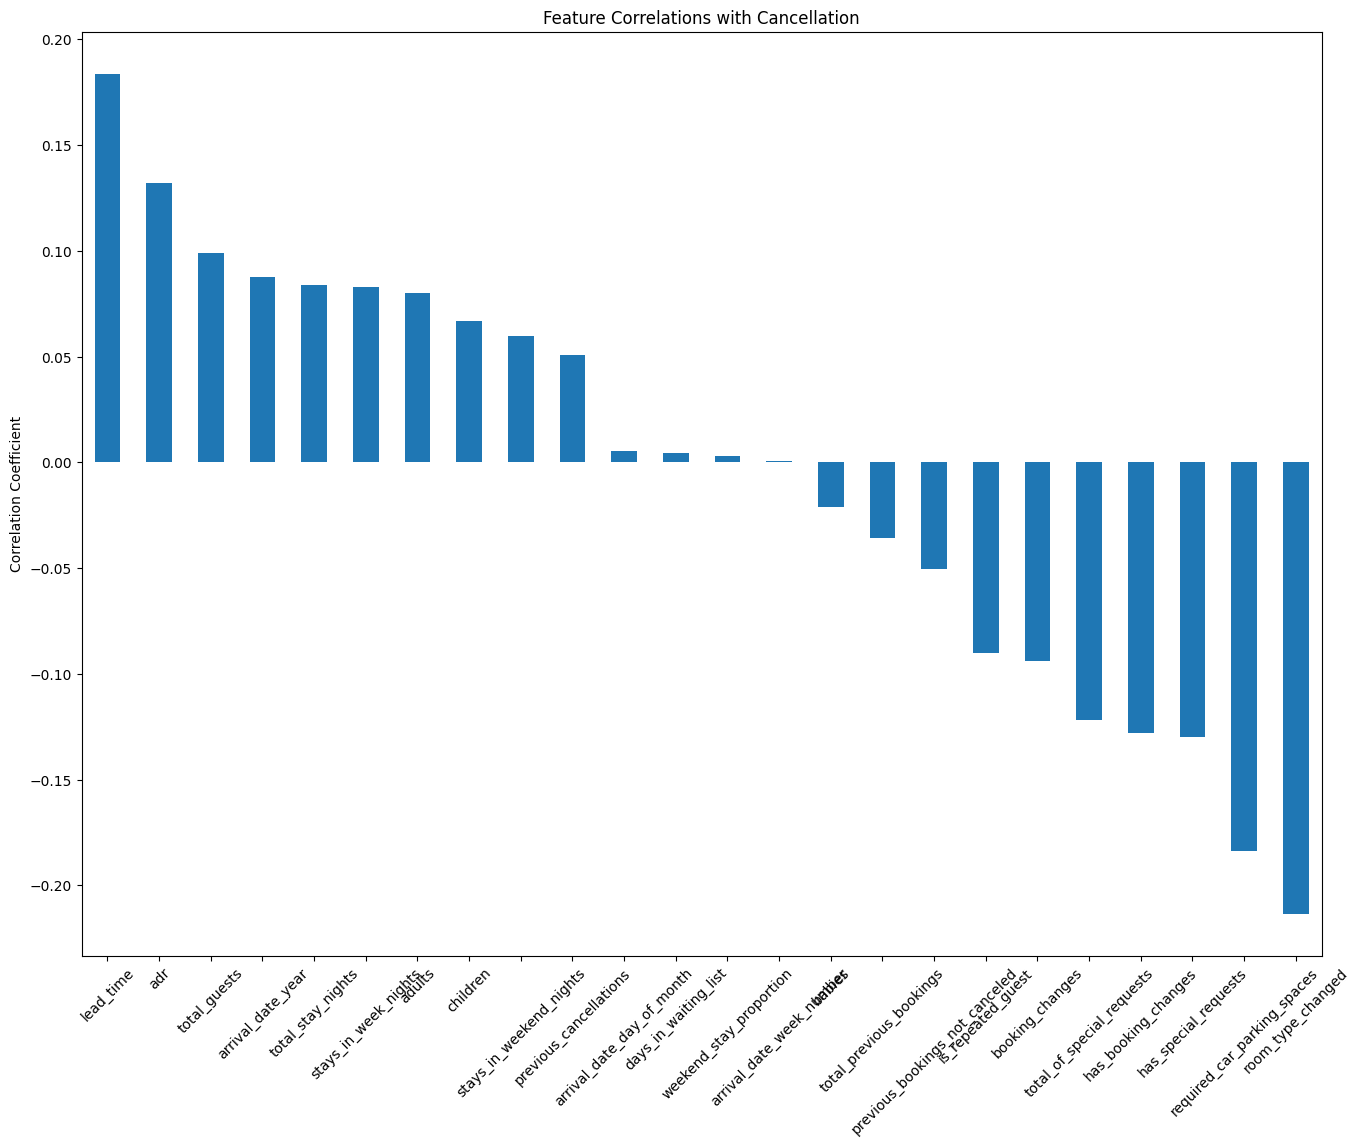

In [77]:
# Feature Importance (using correlation with target for simplicity)
# Select only numerical columns for correlation
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns
correlations = df_encoded[numerical_cols].corr()['is_canceled'].sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(16, 12))
correlations.drop('is_canceled', errors='ignore').plot(kind='bar')
plt.title('Feature Correlations with Cancellation')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

This bar plot summarizes the linear correlation between numerical features and the cancellation status, highlighting which features have a stronger positive or negative relationship with cancellations.
